In [1]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import string
import time
import matplotlib.pyplot as plt
%matplotlib inline

/Users/davidmiller/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


In [2]:
#initializes our dataframes
columns = ['Country','code','Year','BPD']
df= pd.DataFrame(columns=columns)
da = pd.DataFrame(columns = ['Country','Code'])
dall = pd.DataFrame(columns=columns)

In [3]:
#get's a representative page
page = requests.get('https://www.indexmundi.com/energy/?country=al&product=gasoline&graph=consumption')
soup = BeautifulSoup(page.content, 'html.parser')


In [4]:
#finds all the country codes
tb = soup.find('table',id="gvCountries") #get table with countries
for i,ln in enumerate(tb.select('a[href^="?country"]')): #find the line we care about
    ctry = ln.text
    ln = ln.get('href').split('=')[1].split('&')[0]
    da.loc[i] = [ctry,ln]

In [5]:
#Loops through all the countries and grabs the Thousands of barrels per day consumption data for each year
for country,code in zip(da.Country,da.Code):
    time.sleep(1)
    page = requests.get('https://www.indexmundi.com/energy/?country=' + code + '&product=gasoline&graph=consumption')
    soup = BeautifulSoup(page.content, 'html.parser')
    
    for i,ln in enumerate(soup.find_all('tr',align='right')):
        year=list(ln.children)[1].text
        BPD = list(ln.children)[2].text.replace(",","")
        df.loc[i] = [country,code,int(float(year)),float(BPD)]
    dall = dall.append(df)
    #print(dall)

KeyboardInterrupt: 

In [ ]:
#fig, ax = plt.subplots(figsize=(8,6))
#bp = dall.groupby('code').plot(x='Year', y='BPD',ax=ax)


In [ ]:
dw = dall.pivot_table(
        values='BPD', 
        index=['Country', 'code'], 
        columns='Year', 
        aggfunc=np.sum)

In [ ]:
dw.to_csv('GasConsumption.csv')

In [267]:
#Loads the GasCost and GasConsumption (was made by data scraping)
Cost = pd.read_csv("/Users/davidmiller/Desktop/Science Policy/GasCost.csv", encoding = "ISO-8859-1")
Con = pd.read_csv("/Users/davidmiller/Desktop/Science Policy/GasConsumption.csv", encoding = "ISO-8859-1")

In [268]:
#finds the subsets that are in eachother
ConA = Con[Con.Country.isin(Cost.Country)]
CostA = Cost[Cost.Country.isin(Con.Country)]

In [269]:
m1 = pd.melt(ConA, \
            id_vars=['Country','code'], \
            value_vars=list(ConA.columns[2:]), \
            var_name='Year', \
            value_name='BPD')
m2 = pd.melt(CostA, \
            id_vars=['Country','Code'], \
            value_vars=list(CostA.columns[2:]), \
            var_name='Year', \
            value_name='DPL')
m1.Year =  m1.Year.astype('int64')
m2.Year =  m2.Year.astype('int64')
g1 = m1.set_index(['Year', 'Country'])
g2 = m2.set_index(['Year', 'Country'])
g1['DPL'] = g2['DPL']
#ConA = pd.melt(ConA, \
#            id_vars=['Country','code'], \
#            value_vars=list(ConA.columns[2:]), \
#            var_name='Year', \
#            value_name='BPD')
#g2 = m2.groupby(['Country', 'Year']).mean()

#combined = combined.reset_index()
#combined[combined['Country']=='United States']

In [270]:
dall

,Country,code,Year,BPD
0,Afghanistan,af,1986,2.5
1,Afghanistan,af,1987,2.9
2,Afghanistan,af,1988,2.5
3,Afghanistan,af,1989,2.6
4,Afghanistan,af,1990,2.6
5,Afghanistan,af,1991,2.5
6,Afghanistan,af,1992,1.9
7,Afghanistan,af,1993,1.9
8,Afghanistan,af,1994,1.8
9,Afghanistan,af,1995,1.8


In [271]:
df3 = pd.read_csv('/Users/davidmiller/Desktop/Science Policy/MHI.csv')
df4 = pd.read_csv('/Users/davidmiller/Desktop/Science Policy/Population.csv')

In [272]:
m3 = pd.melt(df3, \
            id_vars=['Country Name','Country Code'], \
            value_vars=list(df3.columns[2:]), \
            var_name='Year', \
            value_name='MHI')

In [273]:
m4 = pd.melt(df4, \
            id_vars=['Country Name','Country Code'], \
            value_vars=list(df4.columns[2:]), \
            var_name='Year', \
            value_name='Pop')

In [274]:
m3.Year =  m3.Year.astype('int64')
m4.Year =  m4.Year.astype('int64')
m3.rename(columns={'Country Name': 'Country'}, inplace=True)
m4.rename(columns={'Country Name': 'Country'}, inplace=True)
g3 = m3.set_index(['Year', 'Country'])
g4 = m4.set_index(['Year', 'Country'])
g1['MHI'] = g3['MHI']
g1['Pop'] = g4['Pop']
#g1['NBPD'] = g1['BPD']*1000
g1['Affordibilty'] = (g1.MHI/365.0)/g1.DPL
g1['NDPL'] = g1.DPL/(g1.MHI/365.0)
g1['NBPD'] = g1.BPD*1000/g1.Pop
print m1['BPD']

0          2.5
1          4.7
2         41.0
3          0.2
4          1.8
5          0.3
6        108.0
7          NaN
8          0.2
9        276.0
10        57.0
11         NaN
12         4.2
13         1.1
14         1.2
15         NaN
16        63.0
17         1.1
18         1.5
19         0.5
20         NaN
21         8.0
22         NaN
23         1.4
24       277.0
25         3.5
26        40.0
27         2.0
28         0.4
29         0.7
         ...  
4533      12.0
4534       0.4
4535       0.8
4536     198.0
4537     114.0
4538      18.0
4539       3.2
4540      67.0
4541      68.0
4542      33.0
4543       2.1
4544     123.0
4545       0.3
4546       3.4
4547       0.3
4548      12.0
4549      12.0
4550      41.0
4551      27.0
4552       0.0
4553       6.4
4554      76.0
4555     112.0
4556     320.0
4557    8682.0
4558      11.0
4559      28.0
4560       0.1
4561       5.4
4562       4.1
Name: BPD, Length: 4563, dtype: float64


In [275]:
g1r = g1.reset_index()
mk = g1r.Year == 2012
richmask = g1r.MHI>33000
richmask2012 = g1r.MHI[mk]>33000
richcountries = g1r[mk][richmask2012].Country.unique()
richmask2012 = g1r.Country.isin(richcountries)

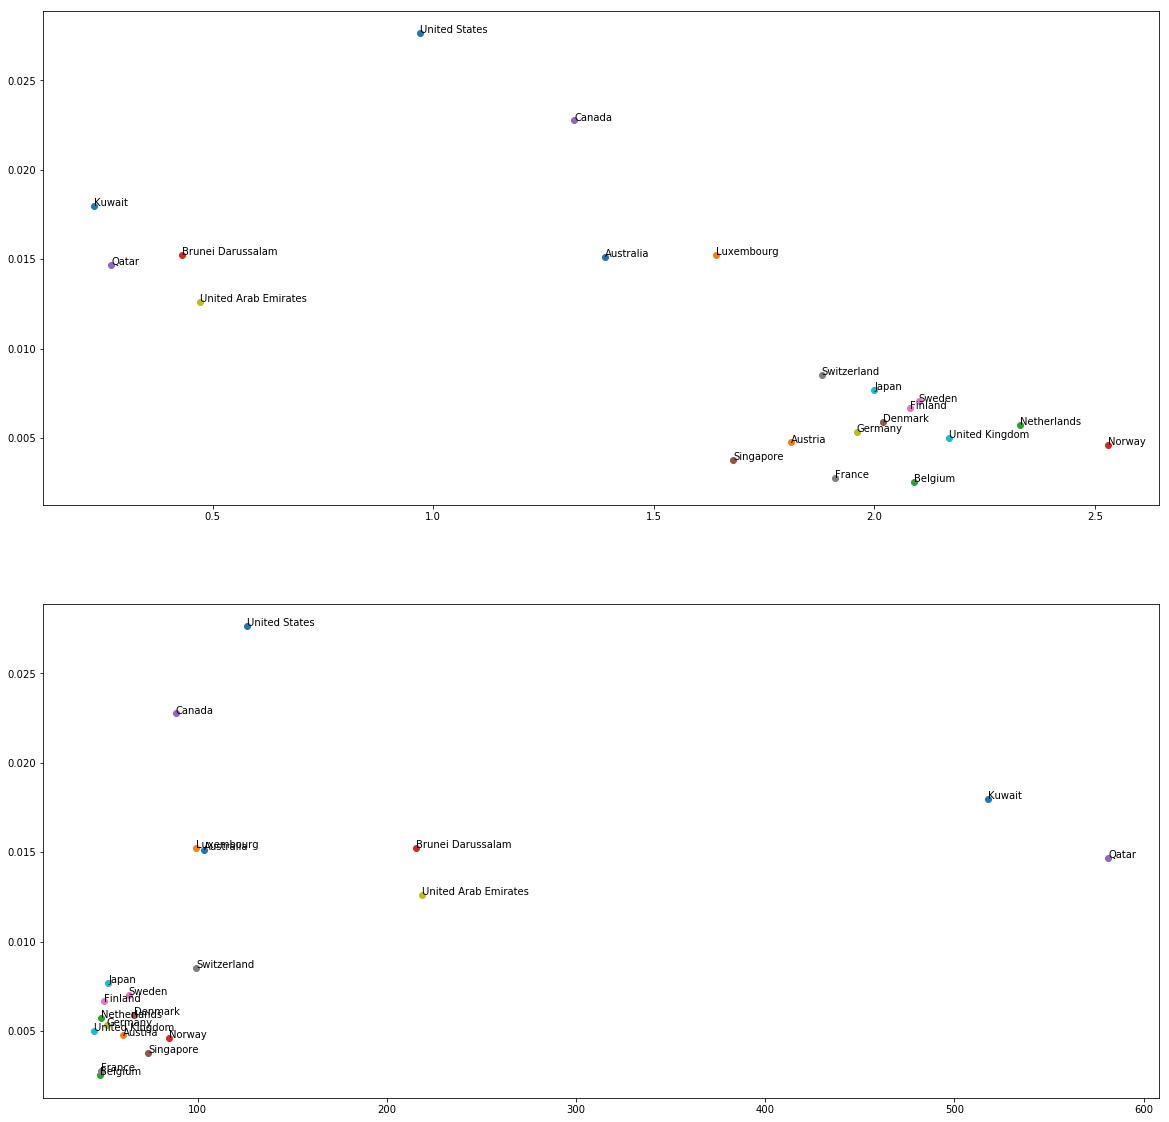

In [276]:
fig,ax = plt.subplots(nrows = 2, figsize = (20,20))
for (dpl,nbpd,con,afr) in zip(g1r[mk&richmask].DPL,g1r[mk&richmask].NBPD,g1r[mk&richmask].Country,g1r[mk&richmask].Affordibilty): 
    ax[0].plot(dpl,nbpd,marker = 'o',ls = '',label = con)
    ax[0].annotate(con,(dpl,nbpd))
    ax[1].plot(afr,nbpd,marker = 'o',ls = '',label = con)
    ax[1].annotate(con,(afr,nbpd))
#ax.legend(loc = 1)
#ax[0].set_xlim([1.5,2.7])
#ax[1].set_xlim([0,50000])
#ax[0].set_ylim([0,.00002])
#ax[1].set_ylim([0,.00002])

In [277]:
import seaborn as sns

/Users/davidmiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


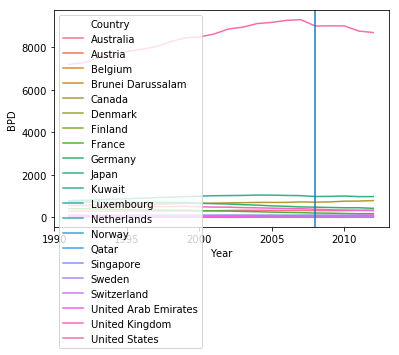

In [278]:
remask = (g1r.Year>1990)
ax = sns.lineplot(x="Year", y="BPD",
             hue="Country",
             data=g1r[richmask2012][remask])
ax.axvline(2008)

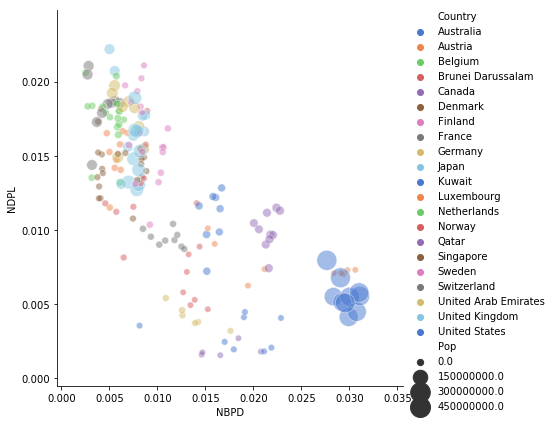

In [279]:
AsiaOceana = ['Australia','Japan','New Zealand','Singapore']
GulfState = ['Brunei Darussalam','Kuwait','Qatar','United Arab Emirates']
USA = ['United States']
Canada = ['Canada']
Europe = ['Austria', 'Belgium',\
 'Denmark','Finland','France','Germany','Iceland','Ireland',\
'Luxembourg','Netherlands','Norway',\
 'Sweden','Switzerland',\
 'United Kingdom']

Regions = {'AsiaOceana':AsiaOceana,'GulfState':GulfState,'USA':USA,\
          'Canada':Canada,'Europe':Europe}

Regions = {'AsiaOceana':AsiaOceana,'USA':USA,\
          'Canada':Canada,'Europe':Europe}


cols = sns.color_palette('deep',len(Regions))

sns.relplot(x="NBPD", y="NDPL", hue="Country", size="Pop",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=g1r[richmask2012&remask])

In [2]:
largemask = g1r[richmask2012&remask].Pop>(15*10**6)

for (i,c) in zip(Regions.keys(),cols):
    regionmask = g1r[richmask2012&remask&largemask].Country.isin(Regions[i])
    plt.scatter(g1r[richmask2012&remask&regionmask&largemask].NDPL,g1r[richmask2012&remask&regionmask&largemask].NBPD,\
              s=g1r[richmask2012&remask&regionmask&largemask].Pop/10**6,alpha = .5,marker = 'o',color = c,label = i)
    
x = g1r[richmask2012&remask&largemask].NDPL
y = g1r[richmask2012&remask&largemask].NBPD
df = pd.DataFrame({'NDPL':x,'NBPD':y})
from lmfit.models import LinearModel
mod = LinearModel()
res = mod.fit(y,x=x, nan_policy='drop')
y = mod.eval(x=x, params = res.params)
plt.plot(x,y)
plt.legend()
#plt.xlim(0,.00008)
#plt.ylim(0,.00004)
#plt.yticks([])
#plt.xticks([])
plt.ylabel('People Drving More (BPD/Population)')
plt.xlabel('Higher is More Expensive')
#print res.params['slope']

NameError: name 'g1r' is not defined

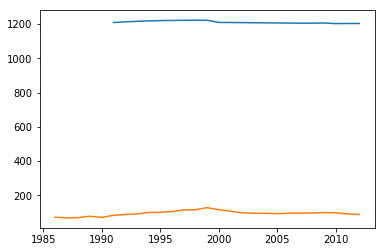

In [111]:
can = g1r['Country'] == 'Poland'
plt.plot(g1r[can].Year,g1r[can].Pop/10**4.5)
plt.plot(g1r[can].Year,g1r[can].BPD)